# Chapter 4. Linear Models

In [1]:
import pandas as pd
import seaborn as sns
import torch
from matplotlib import pyplot as plt

import pyro
import pyro.distributions as dist
import pyro.ops.stats as stats

from rethinking import MAP, coef, extract_samples, link, precis, sim, vcov
sns.set(font_scale=1.25, rc={"figure.figsize": (10, 8)})
%config InlineBackend.figure_format = 'retina'

### Code 4.1

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
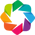

In [20]:
import holoviews as hv
hv.extension('bokeh') # important: doesn't render without it
hv.opts.defaults( hv.opts.Curve(width=800), hv.opts.Points(width=800),hv.opts.Histogram(width=800), hv.opts.Points(size=3))

import numpy as np

### Code 4.2

In [3]:
pos = torch.empty(10000, 16).uniform_(-1, 1).sum(1)

bins = 50
freq, edges = np.histogram(pos, bins)
# freq1 = freq / (freq.sum() / bins)
hv.Histogram((edges, freq) )# * hv.Distribution(samples).opts(bandwidth= 0.1)
# hv.Distribution

:Histogram   [x]   (Frequency)

### Code 4.3

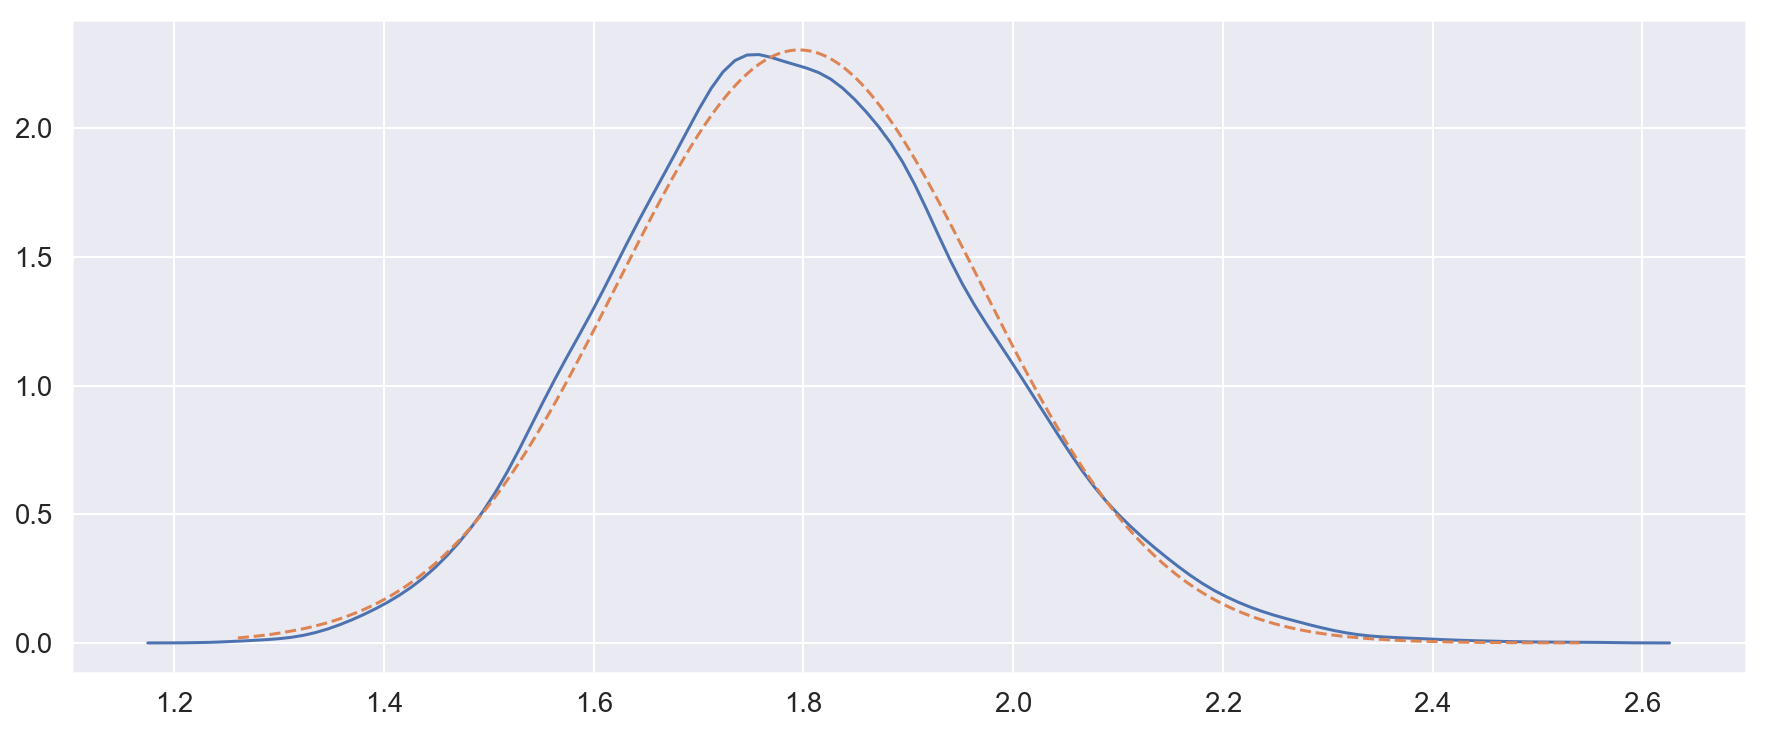

In [15]:
plt.figure(figsize=(15, 6))

growth = (1 + torch.empty(10000, 12).uniform_(0, 0.1)).prod(1)
sns.distplot(growth, hist=False)
ax = sns.lineplot(growth, dist.Normal(growth.mean(),
                                      growth.std()).log_prob(growth).exp())
ax.lines[1].set_linestyle("--")

In [21]:
growth = (1 + torch.empty(10000, 12).uniform_(0, 0.1)).prod(1)
norm_t = dist.Normal(growth.mean(), growth.std()).log_prob(growth).exp()
hv.Distribution((growth, norm_t)) * hv.Points((growth, norm_t)).opts()

:Overlay
   .Distribution.I :Distribution   [Value]   (Density)
   .Points.I       :Points   [x,y]

### Code 4.4

In [22]:
big = (1 + torch.empty(10000, 12).uniform_(0, 0.5)).prod(1)
small = (1 + torch.empty(10000, 12).uniform_(0, 0.01)).prod(1)

In [24]:
growth = big
norm_t = dist.Normal(growth.mean(), growth.std()).log_prob(growth).exp()
hv.Distribution((growth, norm_t)) * hv.Points((growth, norm_t)).opts()

:Overlay
   .Distribution.I :Distribution   [Value]   (Density)
   .Points.I       :Points   [x,y]

In [25]:
growth = small
norm_t = dist.Normal(growth.mean(), growth.std()).log_prob(growth).exp()
hv.Distribution((growth, norm_t)) * hv.Points((growth, norm_t)).opts()

:Overlay
   .Distribution.I :Distribution   [Value]   (Density)
   .Points.I       :Points   [x,y]

### Code 4.5

In [26]:
log_big = (1 + torch.empty(10000, 12).uniform_(0, 0.5)).prod(1).log()

### Code 4.6

how is this different??

In [27]:
w, n = 6., 9
# all possible probabibilities
p_grid = torch.linspace(start=0, end=1, steps=1000)

# posterior = LL[Bin(6 out of 9, for p in pgrid)] * prior 
posterior = (dist.Binomial(n, p_grid).log_prob(torch.tensor(w)).exp()
             * dist.Uniform(0, 1).log_prob(p_grid).exp())

# posterior normalized
posterior = posterior / posterior.sum()

### Code 4.7

In [28]:
howell1 = pd.read_csv("../data/Howell1.csv", sep=";")
d = howell1

### Code 4.8

In [29]:
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
height    544 non-null float64
weight    544 non-null float64
age       544 non-null float64
male      544 non-null int64
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

### Code 4.9

In [30]:
d["height"].head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

### Code 4.10

In [31]:
d2 = d[d["age"] >= 18]
d2_height = torch.tensor(d2["height"], dtype=torch.float)

### Code 4.11

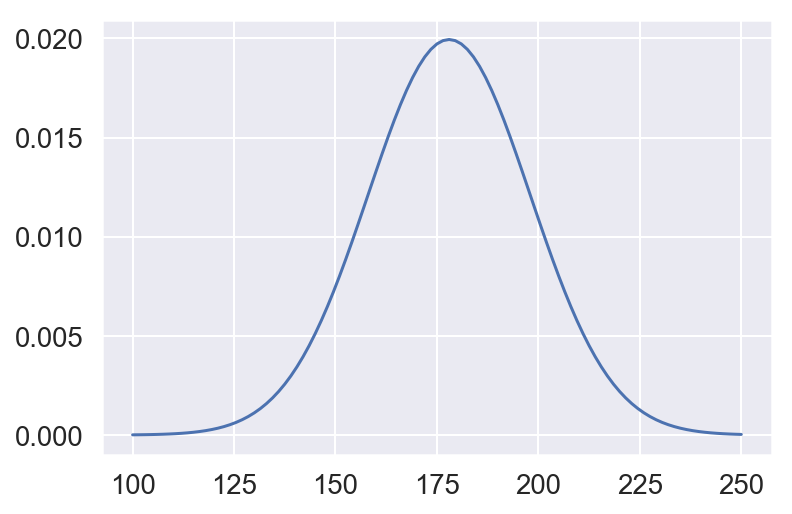

In [32]:
x = torch.linspace(100, 250, 101)
sns.lineplot(x, dist.Normal(178, 20).log_prob(x).exp());

In [36]:
x = torch.linspace(100, 250, 101)
# sns.lineplot(x, dist.Normal(178, 20).log_prob(x).exp());
hv.Curve((x, dist.Normal(178, 20).log_prob(x).exp()))

:Curve   [x]   (y)

### Code 4.12

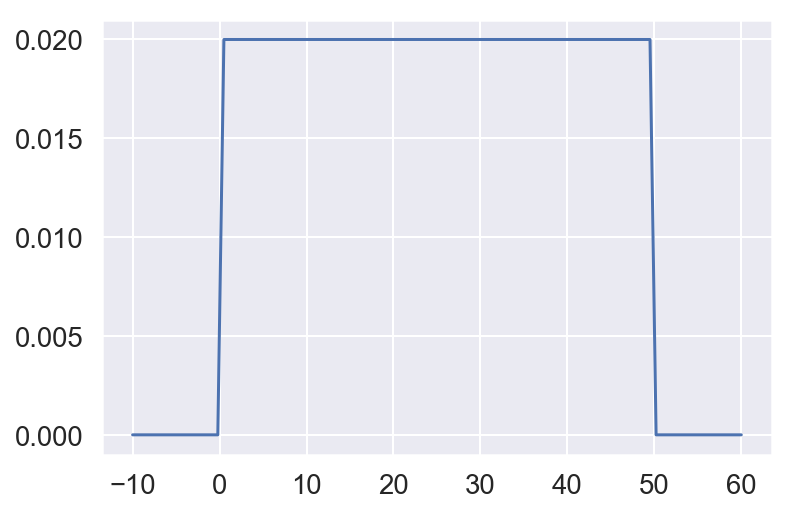

In [37]:
x = torch.linspace(-10, 60, 101)
sns.lineplot(x, dist.Uniform(0, 50, validate_args=False).log_prob(x).exp());

In [41]:
x = torch.linspace(-10, 60, 101)
hv.Curve((x,dist.Uniform(0,50, validate_args=False).log_prob(x).exp())).opts(padding=0.1)

:Curve   [x]   (y)

### Code 4.13

this is the prior distribution of heights using the model 
$$\array
h \sim N(\mu, \sigma) \\
\mu \sim N(178, 20) \\
\sigma \sim U(0,50) \\
$$


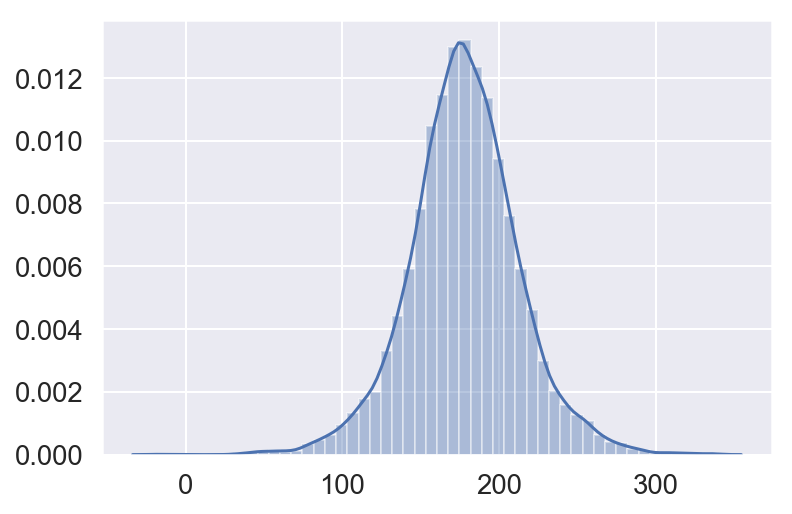

In [14]:
sample_mu = torch.empty(int(1e4)).normal_(178, 20)
sample_sigma = torch.empty(int(1e4)).uniform_(0, 50)
prior_h = dist.Normal(sample_mu, sample_sigma).sample()
sns.distplot(prior_h);

In [46]:
sample_mu = torch.empty(int(1e4)).normal_(178, 20)
sample_sigma = torch.empty(int(1e4)).uniform_(0, 50)
prior_h = dist.Normal(sample_mu, sample_sigma).sample()
# sns.distplot(prior_h);
hv.Distribution(prior_h).opts(width = 600)

:Distribution   [Value]   (Density)

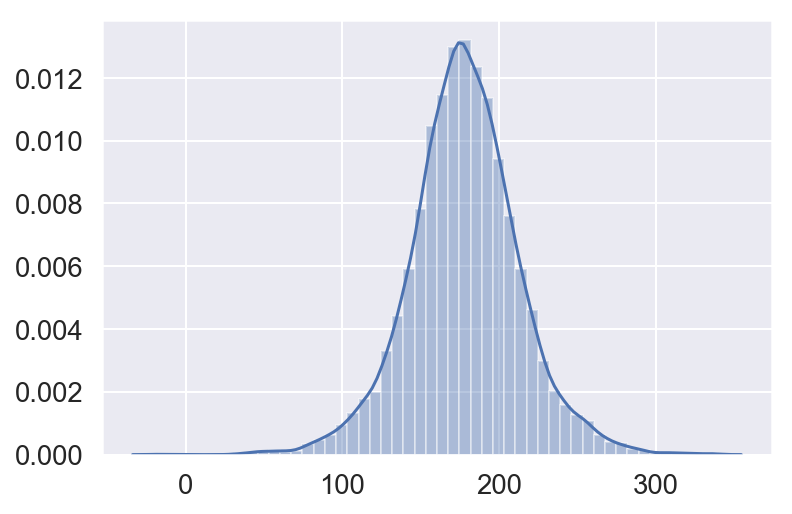

In [14]:
sample_mu = torch.empty(int(1e4)).normal_(178, 20)
sample_sigma = torch.empty(int(1e4)).uniform_(0, 50)
prior_h = dist.Normal(sample_mu, sample_sigma).sample()
sns.distplot(prior_h);

### Code 4.14

In [47]:
mu_list = torch.linspace(start=140, end=160, steps=200)
sigma_list = torch.linspace(start=4, end=9, steps=200)
# post is a grid of values that gets flattened
post = {"mu": mu_list.expand(200, 200).reshape(-1),
        "sigma": sigma_list.expand(200, 200).t().reshape(-1)}

# dist.Normal(...).log_prob(..).shape = 352, 40000 (200 x 200)
# when we sum(0) over this we are effectively multiplying probabilities and getting
# the likelihood for each pair of mu,sigma 
post_LL = dist.Normal(post["mu"],
                      post["sigma"]).log_prob(d2_height.unsqueeze(1)).sum(0)

# then we add the factors of the probability of the respective mu and sigma
post_prod = (post_LL + dist.Normal(178, 20).log_prob(post["mu"])
             + dist.Uniform(0, 50).log_prob(post["sigma"]))
# finally we normalize using the 'max' trick, which I thought I understood once...
# it helps to avoid probabilities of 0, so this is not an exact prob dist
post_prob = (post_prod - max(post_prod)).exp()

### Code 4.15

In [105]:
_a = np.digitize(np.array(post_prob), bins=np.linspace(0,1,11))

In [121]:
img = hv.Image(_df.probs.values.reshape(200,200),bounds=(140,4,160,9))
example = img + hv.operation.contours(img, levels=9)
example

:Layout
   .Image.I    :Image   [x,y]   (z)
   .Contours.I :Contours   [x,y]   (z)

In [122]:
hv.HeatMap(_df)

:HeatMap   [mu,sigma]   (probs)

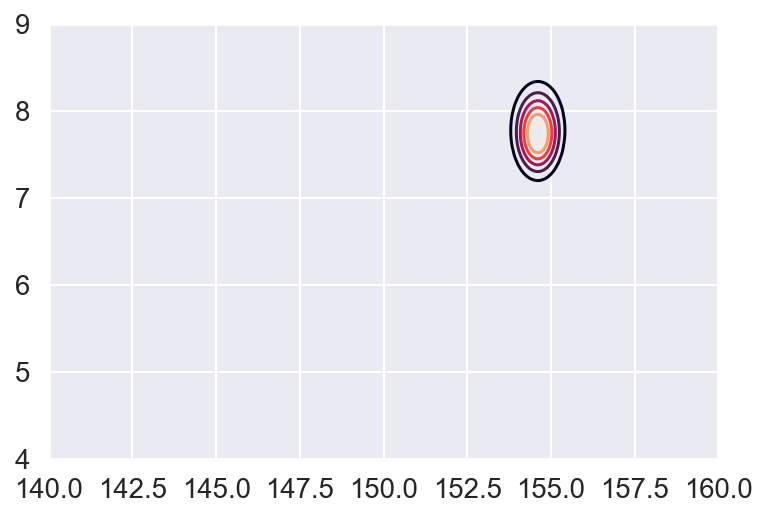

In [16]:
_, ax = sns.mpl.pyplot.subplots()
ax.contour(post["mu"].reshape(200, 200), post["sigma"].reshape(200, 200),
           post_prob.reshape(200, 200));

### Code 4.16
heat map of above graph

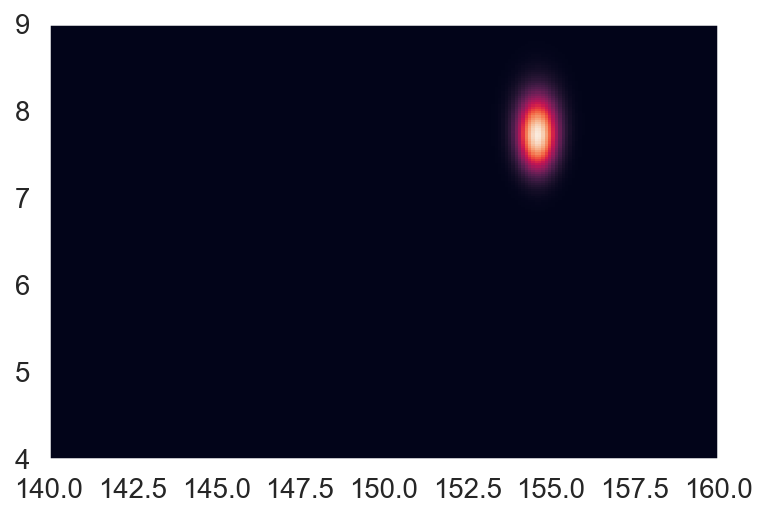

In [17]:
_, ax = sns.mpl.pyplot.subplots()
ax.imshow(post_prob.reshape(200, 200), origin="lower",
          extent=(140, 160, 4, 9), aspect="auto")
ax.grid(False)

### Code 4.17

this is supposed to sample parameter values from `post_prob`

In [123]:
# sample_rows is an array of 1000 (1e4), each value in it is a index from 0 to post_prob-1, chosen with post_prob 
# (how is this different from Empirical ?? Empirical requires the domain, Multinomial just returns an index)

sample_rows = torch.multinomial(input=post_prob, num_samples=int(1e4),
                                replacement=True)
sample_mu = post["mu"][sample_rows]
sample_sigma = post["sigma"][sample_rows]

### Code 4.18

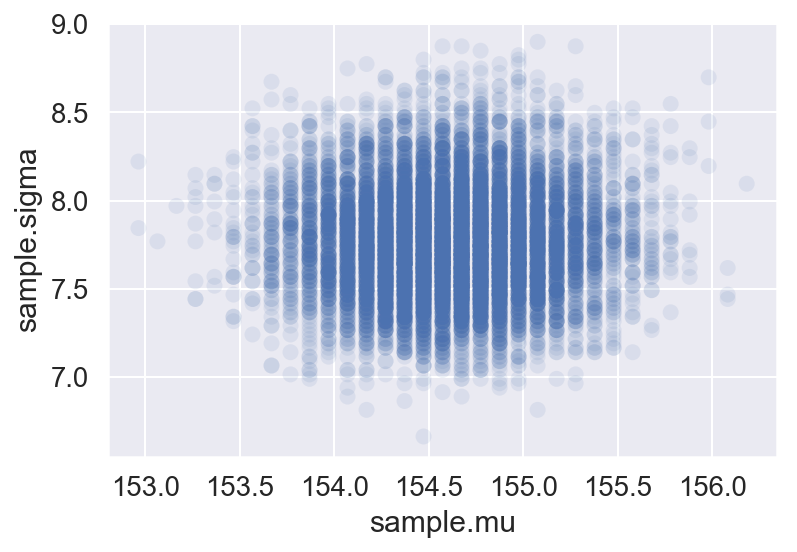

In [19]:
ax = sns.scatterplot(sample_mu, sample_sigma, s=64, alpha=0.1, edgecolor="none")
ax.set(xlabel="sample.mu", ylabel="sample.sigma");

In [138]:
hv.Points((sample_mu, sample_sigma)).opts(size=14, alpha=0.1, width=600, show_grid=True )

:Points   [x,y]

### Code 4.19

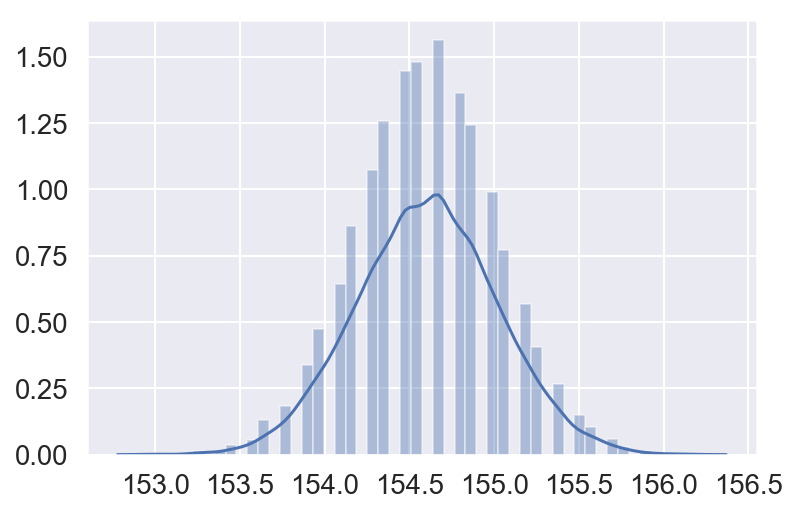

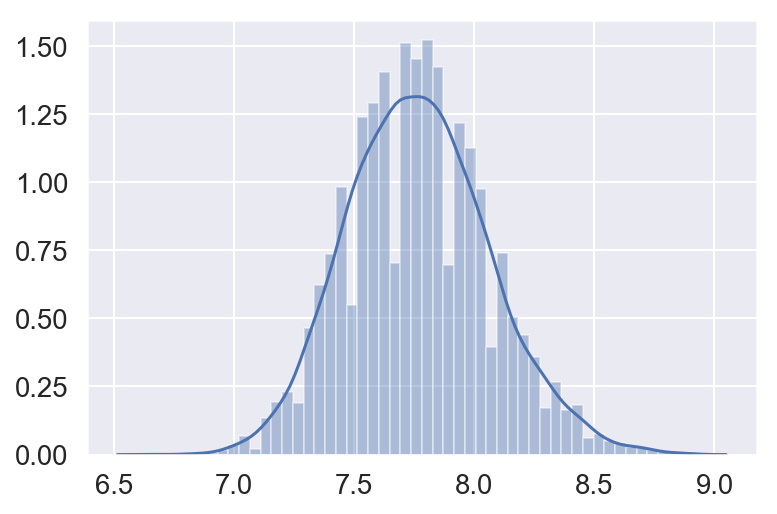

In [20]:
sns.distplot(sample_mu)
sns.mpl.pyplot.show()
sns.distplot(sample_sigma);

In [158]:
frequencies, edges = np.histogram(sample_mu, 40)
# print('Values: %s, Edges: %s' % (frequencies.shape[0], edges.shape[0]))
frequencies = frequencies / 1000
hv.Histogram((edges, frequencies)) * hv.Distribution(sample_mu).opts()

:Overlay
   .Histogram.I    :Histogram   [x]   (Frequency)
   .Distribution.I :Distribution   [Value]   (Density)

In [156]:
frequencies, edges = np.histogram(sample_sigma, 200)
# print('Values: %s, Edges: %s' % (frequencies.shape[0], edges.shape[0]))
frequencies = frequencies / 300
hv.Histogram((edges, frequencies)) * hv.Distribution(sample_sigma)


:Overlay
   .Histogram.I    :Histogram   [x]   (Frequency)
   .Distribution.I :Distribution   [Value]   (Density)

### Code 4.20

In [159]:
print(stats.hpdi(sample_mu, 0.89))
print(stats.hpdi(sample_sigma, 0.89))

tensor([153.8694, 155.1759])
tensor([7.3668, 8.2965])


### Code 4.21

In [160]:
d3 = stats.resample(d2_height, num_samples=300)

### Code 4.22

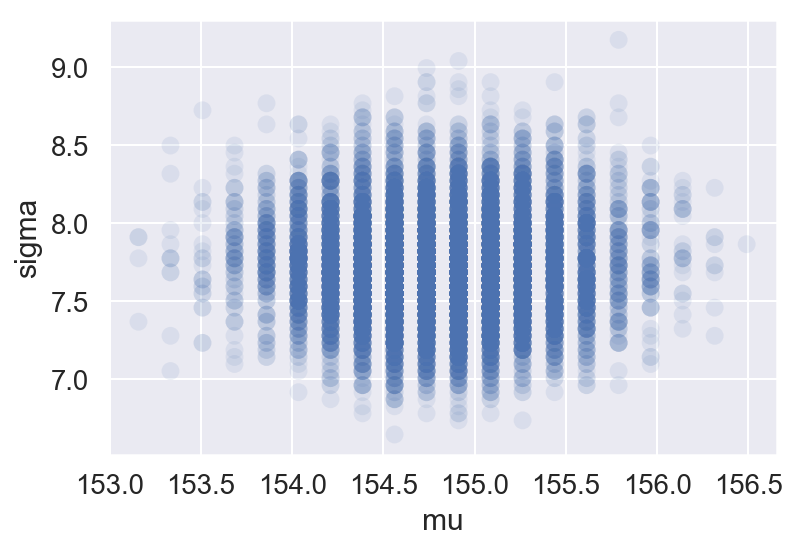

In [161]:
p_steps = 400
mu_list = torch.linspace(start=100, end=170, steps=p_steps)
sigma_list = torch.linspace(start=2, end=20, steps=p_steps)
post2 = {"mu": mu_list.expand(p_steps, p_steps).reshape(-1),
         "sigma": sigma_list.expand(p_steps, p_steps).t().reshape(-1)}
post2_LL = dist.Normal(post2["mu"], post2["sigma"]).log_prob(d3.unsqueeze(1)).sum(0)
post2_prod = (post2_LL + dist.Normal(178, 20).log_prob(post2["mu"])
              + dist.Uniform(0, 50).log_prob(post2["sigma"]))
post2_prob = (post2_prod - max(post2_prod)).exp()
sample2_rows = torch.multinomial(input=post2_prob, num_samples=int(1e4),
                                 replacement=True)
sample2_mu = post2["mu"][sample2_rows]
sample2_sigma = post2["sigma"][sample2_rows]
ax = sns.scatterplot(sample2_mu, sample2_sigma, s=80, alpha=0.1, edgecolor="none")
ax.set(xlabel="mu", ylabel="sigma");

### Code 4.23

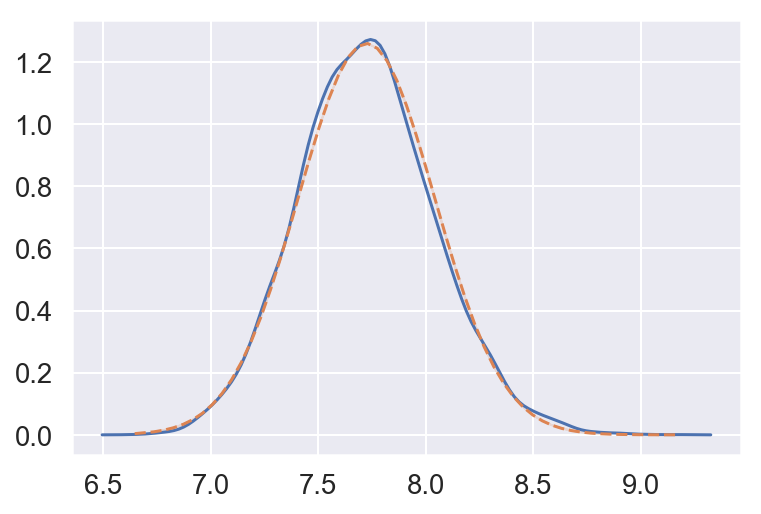

In [162]:
sns.distplot(sample2_sigma, hist=False)
ax = sns.lineplot(sample2_sigma, dist.Normal(sample2_sigma.mean(), sample2_sigma.std())
                  .log_prob(sample2_sigma).exp())
ax.lines[1].set_linestyle("--")

### Code 4.24

In [163]:
howell1 = pd.read_csv("../data/Howell1.csv", sep=";")
d = howell1
d2 = d[d["age"] >= 18]

### Code 4.25

In [164]:
def flist(height):
    mu = pyro.sample("mu", dist.Normal(178, 20))
    sigma = pyro.sample("sigma", dist.Uniform(0, 50))
    with pyro.plate("plate"):
        pyro.sample("height", dist.Normal(mu, sigma), obs=height)

### Code 4.26

In [165]:
d2_height = torch.tensor(d2["height"], dtype=torch.float)
m4_1 = MAP(flist).run(d2_height)

### Code 4.27

In [166]:
precis(m4_1)

Mean  StdDev   |0.89   0.89|
mu     154.61    0.42  153.97  155.30
sigma    7.76    0.29    7.29    8.23

### Code 4.28

In [167]:
start = {"mu": d2_height.mean(), "sigma": d2_height.std()}

### Code 4.29
These numbers provide **Gaussian** approximations for each parameter’s **marginal** distribution.

In [168]:
def model(height):
    mu = pyro.sample("mu", dist.Normal(178, 0.1))
    sigma = pyro.sample("sigma", dist.Uniform(0, 50))
    with pyro.plate("plate"):
        pyro.sample("height", dist.Normal(mu, sigma), obs=height)

m4_2 = MAP(model).run(d2_height)
precis(m4_2)

Mean  StdDev   |0.89   0.89|
mu     177.87    0.10  177.71  178.03
sigma   24.55    0.93   23.10   26.05

### Code 4.30

In [169]:
vcov(m4_1)

tensor([[0.1748, 0.0012],
        [0.0012, 0.0868]])

### Code 4.31

In [170]:
print(vcov(m4_1).diag())
cov = vcov(m4_1)
print(cov / cov.diag().ger(cov.diag()).sqrt())

tensor([0.1748, 0.0868])
tensor([[1.0000, 0.0101],
        [0.0101, 1.0000]])


### Code 4.32

In [171]:
post = extract_samples(m4_1)
{latent: post[latent][:5] for latent in post}

{'mu': tensor([153.9669, 155.1202, 154.6556, 154.6192, 154.3313]),
 'sigma': tensor([7.5310, 8.0170, 7.5828, 7.5272, 7.8506])}

### Code 4.33

In [34]:
precis(post)

Mean  StdDev   |0.89   0.89|
mu     154.62    0.42  153.99  155.31
sigma    7.74    0.29    7.29    8.22

### Code 4.34

In [35]:
## this could be our predictive model, if we were just going to use point values for the respective mu and sigmas of the mu and sigmas.. 
post = dist.MultivariateNormal(torch.stack(list(coef(m4_1).values())),
                               vcov(m4_1)).sample(torch.Size([int(1e4)]))

### Code 4.35

note the use of log_sigma here. this is because 
apparently $\sigma$ isn't typically normally distributed (make sense cuz $\sigma > 0 $)

In [36]:
# note the use of log_sigma here. this is because 
# apparently \sigma isn't typically normally distributed (make sense cuz \sigma > 0 )
def model(height):
    mu = pyro.sample("mu", dist.Normal(178, 20))
    log_sigma = pyro.sample("log_sigma", dist.Normal(2, 10))
    with pyro.plate("plate"):
        pyro.sample("height", dist.Normal(mu, log_sigma.exp()), obs=height)

m4_1_logsigma = MAP(model).run(d2_height)

### Code 4.36

extract_samples seems to create 1e4 samples from posterior 

In [37]:
post = extract_samples(m4_1_logsigma)
sigma = post["log_sigma"].exp()

### Code 4.37
d2 has 352 points in it.

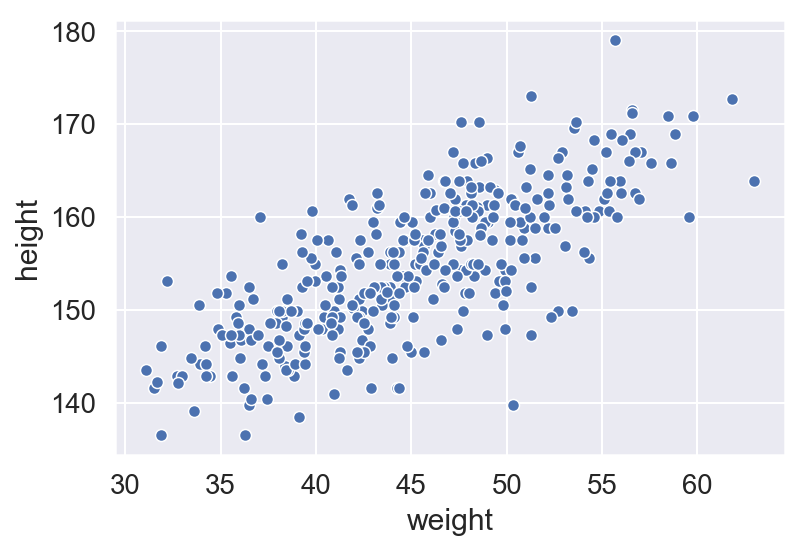

In [38]:
sns.scatterplot("weight", "height", data=d2);

In [178]:
hv.Points(d2, kdims=['weight','height']).opts(show_grid=True, size=5)

:Points   [weight,height]   (age,male)

### Code 4.38

In [172]:
# load data again, since it's a long way back
howell1 = pd.read_csv("../data/Howell1.csv", sep=";")
d = howell1
d2 = d[d["age"] >= 18]

# fit model
def model(weight, height):
    a = pyro.sample("a", dist.Normal(178, 100))
    b = pyro.sample("b", dist.Normal(0, 10))
    mu = a + b * weight
    sigma = pyro.sample("sigma", dist.Uniform(0, 50))
    with pyro.plate("plate"):
        pyro.sample("height", dist.Normal(mu, sigma), obs=height)

d2_weight = torch.tensor(d2["weight"], dtype=torch.float)
d2_height = torch.tensor(d2["height"], dtype=torch.float)
m4_3 = MAP(model).run(d2_weight, d2_height)

### Code 4.39

seems the same as 4.38 except $\mu$ has been moved inside `dist.Norm()`

In [175]:
def model(weight, height):
    a = pyro.sample("a", dist.Normal(178, 100))
    b = pyro.sample("b", dist.Normal(0, 10))
    sigma = pyro.sample("sigma", dist.Uniform(0, 50))
    with pyro.plate("plate"):
        pyro.sample("height", dist.Normal(a + b * weight, sigma), obs=height)

m4_3 = MAP(model).run(d2_weight, d2_height)

### Code 4.40

In [176]:
precis(m4_3)

Mean  StdDev   |0.89   0.89|
a      113.88    1.91  111.00  117.09
b        0.91    0.04    0.84    0.97
sigma    5.08    0.19    4.77    5.38

### Code 4.41

In [42]:
precis(m4_3, corr=True)

Mean  StdDev   |0.89   0.89|     a     b  sigma
a      113.89    1.89  110.87  116.89  1.00 -0.99  -0.01
b        0.90    0.04    0.84    0.97 -0.99  1.00   0.01
sigma    5.08    0.19    4.76    5.37 -0.01  0.01   1.00

### Code 4.42

In [43]:
d2_weight_c = d2_weight - d2_weight.mean()

### Code 4.43

In [44]:
m4_4 = MAP(model).run(d2_weight_c, d2_height)

### Code 4.44

In [45]:
precis(m4_4, corr=True)

Mean  StdDev   |0.89   0.89|     a     b  sigma
a      154.59    0.27  154.18  155.03  1.00  0.02  -0.02
b        0.90    0.04    0.84    0.97  0.02  1.00   0.00
sigma    5.08    0.19    4.78    5.39 -0.02  0.00   1.00

### Code 4.45

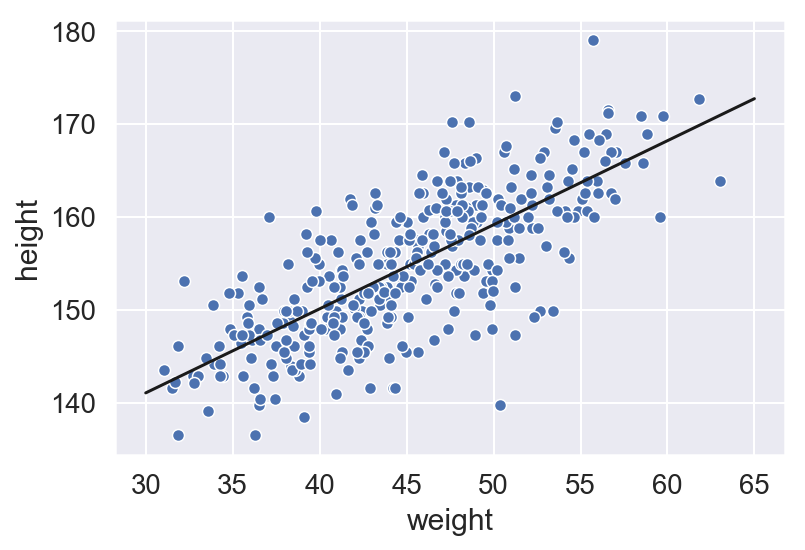

In [46]:
sns.scatterplot("weight", "height", data=d2)
x = torch.linspace(30, 65, 101)
sns.lineplot(x, (coef(m4_3)["a"] + coef(m4_3)["b"] * x), color="k");

In [181]:
dots = hv.Points(d2, kdims=["weight", "height"])
x = torch.linspace(30, 65, 101)
ln = hv.Curve((x, (coef(m4_3)["a"] + coef(m4_3)["b"] * x))).opts(color='black')
dots * ln

:Overlay
   .Points.I :Points   [weight,height]   (age,male)
   .Curve.I  :Curve   [x]   (y)

### Code 4.46

In [182]:
post = extract_samples(m4_3)

### Code 4.47

In [183]:
{latent: post[latent][:5].detach() for latent in post}

{'a': tensor([112.5141, 113.8504, 115.1834, 118.5669, 113.1198]),
 'b': tensor([0.9308, 0.9062, 0.8668, 0.8167, 0.9222]),
 'sigma': tensor([5.5038, 4.9995, 5.2564, 4.9463, 4.7834])}

### Code 4.48

so `mN` is ??? 3 random vars `a,b,sigma`, but how are they described? are they supposed to be normal or what? or does the model itself, their description?

that's why we sample from them, to characterize them

In [184]:
N = 10
dN = {"weight": d2_weight[:N], "height": d2_height[:N]}
mN = MAP(model).run(**dN)

### Code 4.49

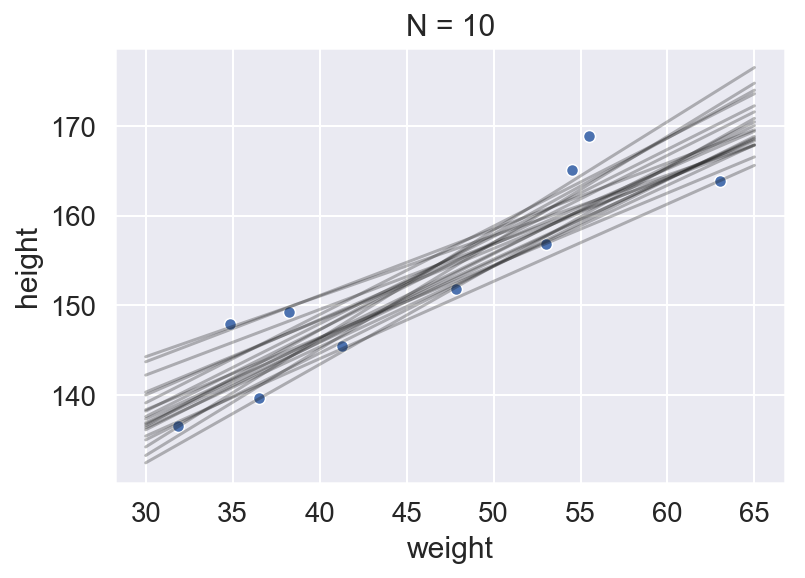

In [185]:
# extract 20 samples from the posterior
idx = mN._categorical.sample(torch.Size([20]))
post = {latent: samples[idx] for latent, samples in extract_samples(mN).items()}

# display raw data and sample size
ax = sns.scatterplot("weight", "height", data=dN)
ax.set(xlabel="weight", ylabel="height", title="N = {}".format(N))

# plot the lines, with transparency
x = torch.linspace(30, 65, 101)
for i in range(20):
    sns.lineplot(x, post["a"][i] + post["b"][i] * x, color="k", alpha=0.3)

### Code 4.50

In [51]:
post = extract_samples(m4_3)
mu_at_50 = post["a"] + post["b"] * 50

### Code 4.51

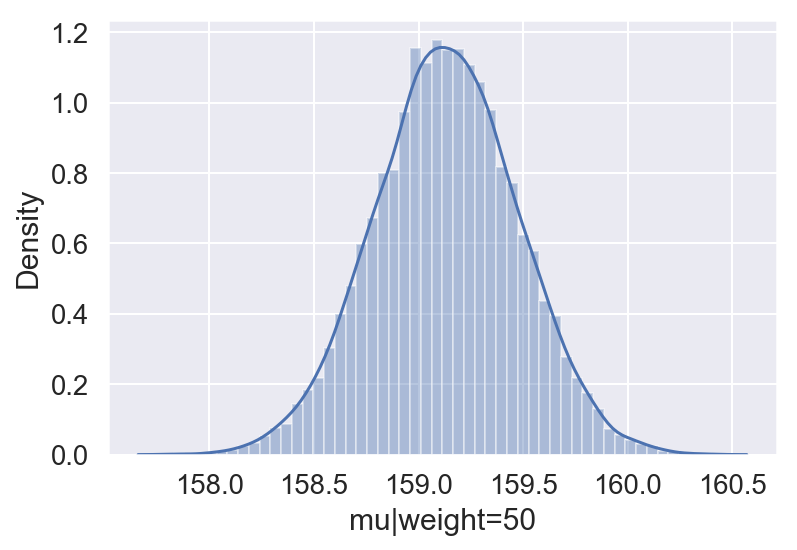

In [52]:
ax = sns.distplot(mu_at_50)
ax.set(xlabel="mu|weight=50", ylabel="Density");

### Code 4.52

In [53]:
stats.hpdi(mu_at_50, prob=0.89)

tensor([158.6077, 159.6976])

### Code 4.53

why 1000 by 352 ?? d2 has 352 rows and maybe we try 1000 a,b,sigma samples to get a 1000 different parameter likelihoods for each data point?

The function link provides a posterior distribution of μ for each case we feed it. 
but we can modify this to provide a posterior distribution for a different set of points.

In [54]:
mu = link(m4_3)
mu.shape, mu[:5, 0]

(torch.Size([1000, 352]),
 tensor([157.5455, 157.6339, 157.1779, 156.5121, 156.3116]))

### Code 4.54

In [55]:
# define sequence of weights to compute predictions for
# these values will be on the horizontal axis
weight_seq = torch.arange(start=25., end=71, step=1)

# use link to compute mu
# for each sample from posterior
# and for each weight in weight_seq
mu = link(m4_3, data={"weight": weight_seq})
mu.shape, mu[:5, 0]

(torch.Size([1000, 46]),
 tensor([137.1856, 135.9468, 137.4030, 137.5842, 137.7546]))

### Code 4.55

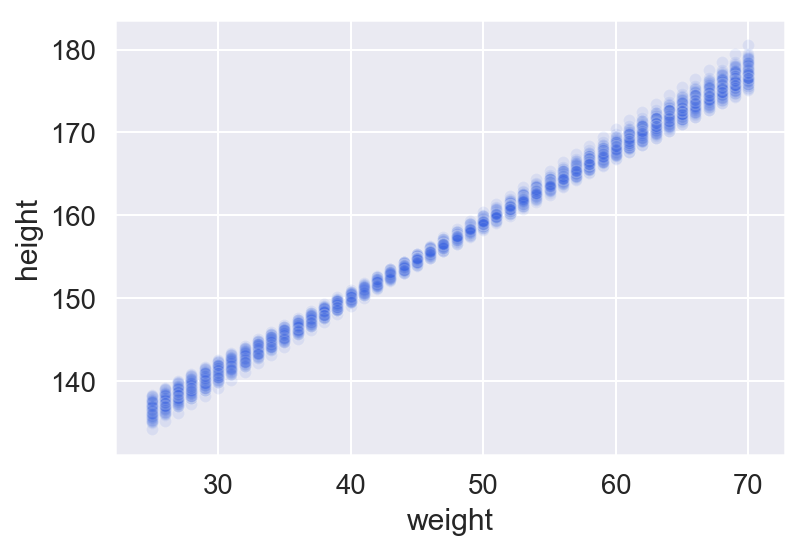

In [56]:
# use visible=False to hide raw data
sns.scatterplot("weight", "height", data=d2, visible=False)

# loop over samples and plot each mu value
for i in range(100):
    sns.scatterplot(weight_seq, mu[i], color="royalblue", alpha=0.1)

### Code 4.56

In [57]:
# summarize the distribution of mu
mu_mean = mu.mean(0)
mu_HPDI = stats.hpdi(mu, prob=0.89, dim=0)

### Code 4.57

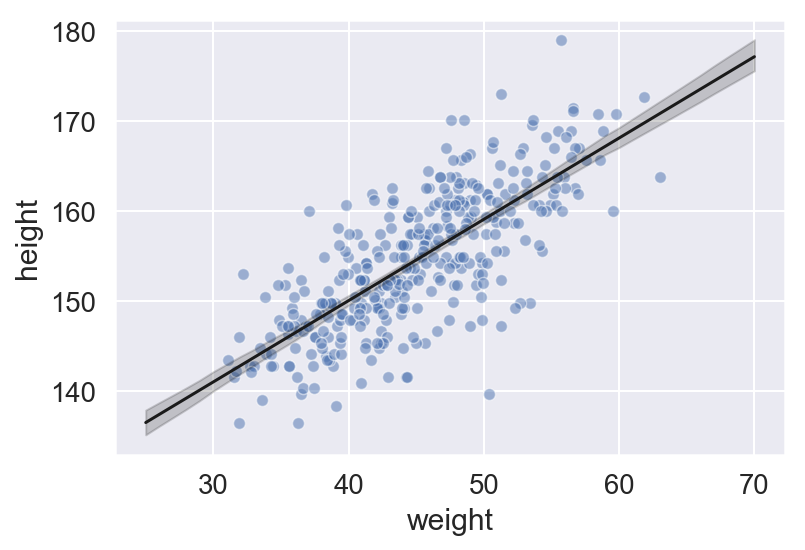

In [58]:
# plot raw data
# fading out points to make line and interval more visible
sns.scatterplot("weight", "height", data=d2, alpha=0.5)

# plot the MAP line, aka the mean mu for each weight
ax = sns.lineplot(weight_seq, mu_mean, color="k")

# plot a shaded region for 89% HPDI
ax.fill_between(weight_seq, mu_HPDI[0], mu_HPDI[1], color="k", alpha=0.2);

### Code 4.58

In [59]:
post = extract_samples(m4_3)
# pay attention to unsqueeze param !!
# mu_link returns the mu that our likelihood function will use
mu_link = lambda weight: post["a"].unsqueeze(1) + post["b"].unsqueeze(1) * weight
weight_seq = torch.arange(start=25., end=71, step=1)
mu = mu_link(weight_seq)
mu_mean = mu.mean(0)
mu_HPDI = stats.hpdi(mu, prob=0.89, dim=0)

### Code 4.59

In [75]:
# we can use this sim() or we can use our own handmade sim_fn() as below.
# sim_height are actual values returned by the likelihood function 
sim_height = sim(m4_3, data={"weight": weight_seq})
sim_height.shape, sim_height[:5, 0]

(torch.Size([1000, 30]),
 tensor([113.2040, 121.9963, 116.8834, 114.4986, 112.2865]))

### Code 4.60

In [61]:
# height_PI 
height_PI = stats.pi(sim_height, prob=0.89, dim=0)

### Code 4.61

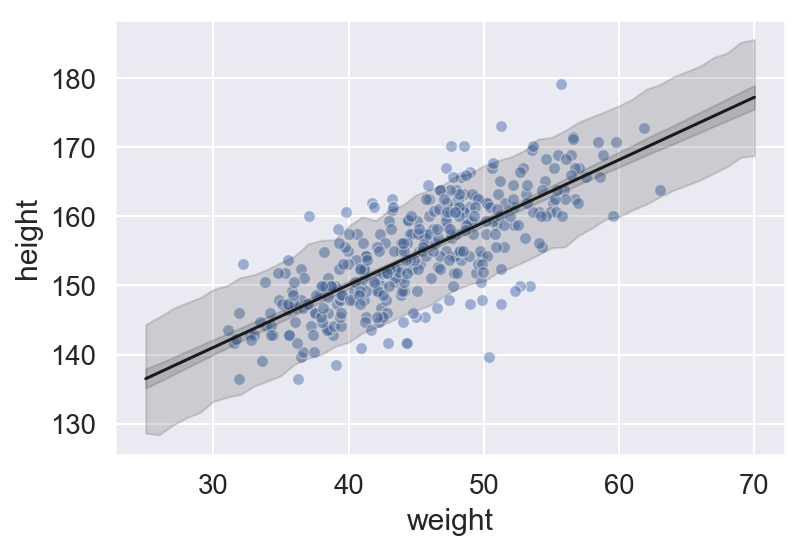

In [62]:
# plot raw data
sns.scatterplot("weight", "height", data=d2, alpha=0.5)

# draw MAP line
ax = sns.lineplot(weight_seq, mu_mean, color="k")

# draw HPDI region for line
ax.fill_between(weight_seq, mu_HPDI[0], mu_HPDI[1], color="k", alpha=0.15)

# draw PI region for simulated heights
ax.fill_between(weight_seq, height_PI[0], height_PI[1], color="k", alpha=0.15);

### Code 4.62

In [63]:
sim_height = sim(m4_3, data={"weight": weight_seq}, n=int(1e4))
height_PI = stats.pi(sim_height, prob=0.89, dim=0)

### Code 4.63

In [64]:
def sim_fn(weight):
    mean = post["a"].unsqueeze(1) + post["b"].unsqueeze(1) * weight
    sd = post["sigma"].unsqueeze(1)
    return dist.Normal(loc=mean, scale=sd).sample()

post = extract_samples(m4_3)
weight_seq = torch.arange(start=25., end=71, step=1)
sim_height = sim_fn(weight_seq)
height_PI = stats.pi(sim_height, prob=0.89, dim=0)

### Code 4.64

In [65]:
howell1 = pd.read_csv("../data/Howell1.csv", sep=";")
d = howell1
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
height    544 non-null float64
weight    544 non-null float64
age       544 non-null float64
male      544 non-null int64
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

### Code 4.65

In [66]:
weight = torch.tensor(d["weight"], dtype=torch.float)
weight_s = (weight - weight.mean()) / weight.std()

### Code 4.66

In [67]:
def model(weight, weight2, height):
    a = pyro.sample("a", dist.Normal(178, 100))
    b1 = pyro.sample("b1", dist.Normal(0, 10))
    b2 = pyro.sample("b2", dist.Normal(0, 10))
    mu = a + b1 * weight + b2 * weight2
    sigma = pyro.sample("sigma", dist.Uniform(0, 50))
    with pyro.plate("plate"):
        pyro.sample("height", dist.Normal(mu, sigma), obs=height)

weight_s2 = weight_s ** 2
height = torch.tensor(d["height"], dtype=torch.float)
m4_5 = MAP(model).run(weight_s, weight_s2, height)

### Code 4.67

In [68]:
precis(m4_5)

Mean  StdDev   |0.89   0.89|
a      146.66    0.38  146.04  147.24
b1      21.40    0.29   20.93   21.86
b2      -8.41    0.28   -8.87   -7.97
sigma    5.76    0.18    5.48    6.04

### Code 4.68

In [69]:
weight_seq = torch.linspace(start=-2.2, end=2, steps=30)
pred_data = {"weight": weight_seq, "weight2": weight_seq ** 2}
mu = link(m4_5, data=pred_data)
mu_mean = mu.mean(0)
mu_PI = stats.pi(mu, prob=0.89, dim=0)
sim_height = sim(m4_5, data=pred_data)
height_PI = stats.pi(sim_height, prob=0.89, dim=0)

### Code 4.69

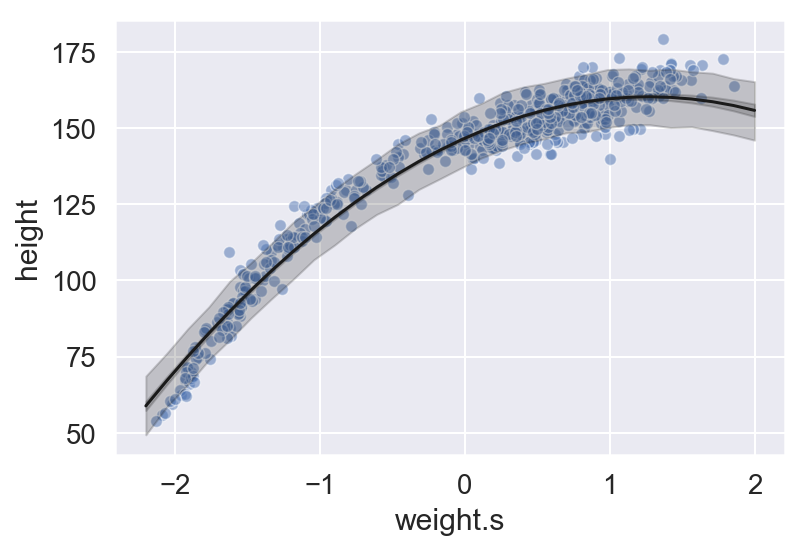

In [70]:
ax = sns.scatterplot(weight_s, height, alpha=0.5)
ax.set(xlabel="weight.s", ylabel="height")
sns.lineplot(weight_seq, mu_mean, color="k")
ax.fill_between(weight_seq, mu_PI[0], mu_PI[1], color="k", alpha=0.2)
ax.fill_between(weight_seq, height_PI[0], height_PI[1], color="k", alpha=0.2);

### Code 4.70

In [71]:
def model(weight, weight2, weight3, height):
    a = pyro.sample("a", dist.Normal(178, 100))
    b1 = pyro.sample("b1", dist.Normal(0, 10))
    b2 = pyro.sample("b2", dist.Normal(0, 10))
    b3 = pyro.sample("b3", dist.Normal(0, 10))
    mu = a + b1 * weight + b2 * weight2 + b3 * weight3
    sigma = pyro.sample("sigma", dist.Uniform(0, 50))
    with pyro.plate("plate"):
        pyro.sample("height", dist.Normal(mu, sigma), obs=height)

weight_s3 = weight_s ** 3
m4_6 = MAP(model).run(weight_s, weight_s2, weight_s3, height)

### Code 4.71

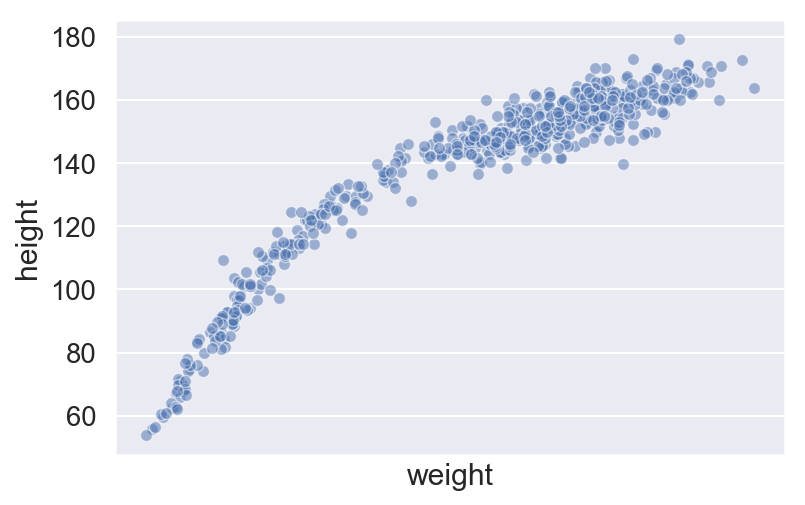

In [72]:
fig, ax = sns.mpl.pyplot.subplots()
sns.scatterplot(weight_s, height, alpha=0.5)
ax.set(xlabel="weight", ylabel="height", xticks=[]);

### Code 4.72

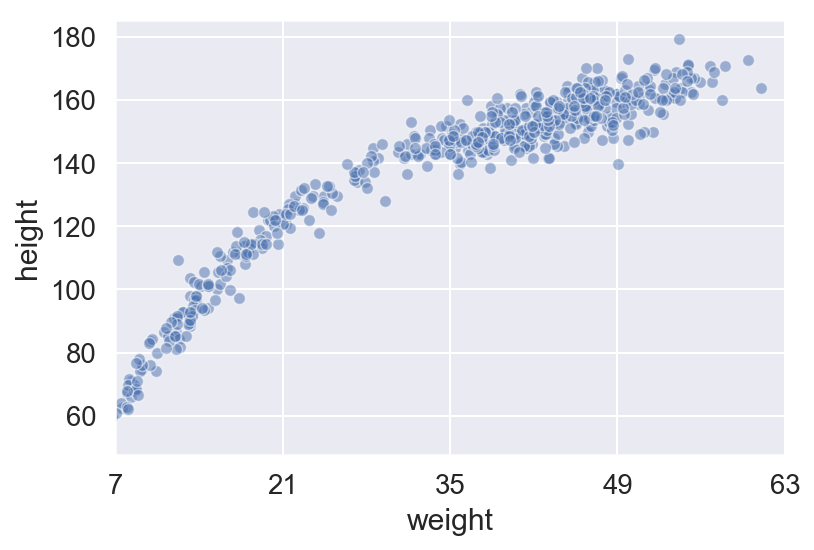

In [73]:
at = torch.tensor([-2, -1, 0, 1, 2])
labels = at * weight.std() + weight.mean()
ax.set_xticks(at)
ax.set_xticklabels([round(label.item(), 1) for label in labels])
fig

### Code 4.73

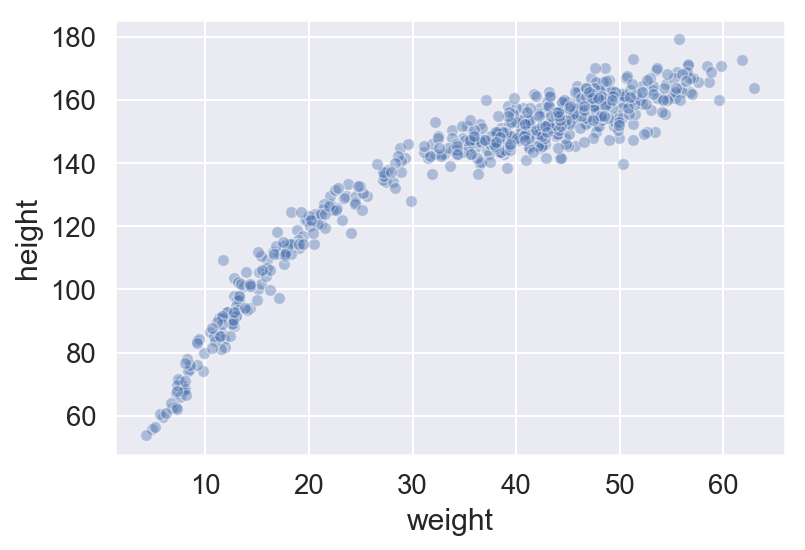

In [74]:
sns.scatterplot("weight", "height", data=howell1, alpha=0.4);